In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math

%matplotlib inline

In [24]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
val= pd.read_csv('val.csv')
train.head()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,letter
0,4,7,5,5,4,7,6,7,5,6,4,7,3,7,3,7,N
1,3,9,4,7,2,7,6,14,5,8,13,7,3,9,0,8,U
2,3,3,4,4,1,7,7,4,4,7,6,8,3,8,4,8,X
3,4,5,5,4,5,8,8,4,4,7,7,8,5,10,9,10,S
4,6,9,8,7,5,4,9,6,7,7,10,11,3,9,1,8,U


In [25]:

for i in range(16):
    m=np.mean(np.array(train.iloc[:,i]))
    s=np.std(np.array(train.iloc[:,i]))
    for j in range(train.shape[0]):
        train.iloc[j,i]=(train.iloc[j,i]-m)/s      

In [26]:
for i in range(16):
    m=np.mean(np.array(val.iloc[:,i]))
    s=np.std(np.array(val.iloc[:,i]))
    for j in range(val.shape[0]):
        val.iloc[j,i]=(val.iloc[j,i]-m)/s 

In [27]:
for i in range(16):
    m=np.mean(np.array(test.iloc[:,i]))
    s=np.std(np.array(test.iloc[:,i]))
    for j in range(test.shape[0]):
        test.iloc[j,i]=(test.iloc[j,i]-m)/s  

In [28]:
train.head()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,letter
0,-0.012337,-0.018656,-0.057692,-0.171662,0.227644,0.059080,-0.648402,0.863682,-0.073603,-0.922694,-0.943315,-0.451266,-0.017773,-0.870800,-0.269332,-0.493937,N
1,-0.538183,0.587673,-0.555371,0.710046,-0.688286,0.059080,-0.648402,3.435342,-0.073603,-0.118226,2.509672,-0.451266,-0.017773,0.427932,-1.438517,0.122773,U
2,-0.538183,-1.231314,-0.555371,-0.612515,-1.146251,0.059080,-0.217658,-0.238458,-0.491805,-0.520460,-0.175984,0.026498,-0.017773,-0.221434,0.120396,0.122773,X
3,-0.012337,-0.624985,-0.057692,-0.612515,0.685609,0.553315,0.213086,-0.238458,-0.491805,-0.520460,0.207681,0.026498,0.839558,1.077298,2.069037,1.356192,S
4,1.039355,0.587673,1.435342,0.710046,0.685609,-1.423624,0.643830,0.496302,0.762800,-0.520460,1.358677,1.459789,-0.017773,0.427932,-1.048788,0.122773,U


In [30]:
alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
char_to_int = dict((c, i) for i, c in enumerate(alphabet))
int_to_char = dict((i, c) for i, c in enumerate(alphabet))
integer_encoded = [char_to_int[char] for char in train['letter']]
onehot_encoded = list()
for value in integer_encoded:
	letter = [0 for _ in range(len(alphabet))]
	letter[value] = 1
	onehot_encoded.append(letter)
print(onehot_encoded)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [31]:
train['letter']=onehot_encoded

In [32]:
integer_encoded = [char_to_int[char] for char in val['letter']]
onehot_encoded = list()
for value in integer_encoded:
	letter = [0 for _ in range(len(alphabet))]
	letter[value] = 1
	onehot_encoded.append(letter)
val['letter']=onehot_encoded

In [33]:
def sigmoidify(z):
        return 1/(1+np.exp(-z))

In [34]:
def sigmoid_derivative(x):
    return np.multiply(sigmoidify(x),(1-sigmoidify(x)))

In [35]:
def softmax(z):
    e_x = np.exp(z)
    return e_x / e_x.sum()

In [36]:
def next_layer(w,b,x):
    return np.dot(w,x)+b

In [37]:
def grad_last_weights(y_predicted,y,p,w):
    return np.outer(y_predicted-y,p),y_predicted-y,np.dot(w.T,y_predicted-y)

In [38]:
def grad_other_weights(dC_dp,x,o,w):
    return np.outer(np.multiply(dC_dp,sigmoid_derivative(x)),o),np.multiply(dC_dp,sigmoid_derivative(x)),np.dot(w.T,np.multiply(dC_dp,sigmoid_derivative(x)))

In [39]:
arr=np.array(train.iloc[:,16])
print(arr[1])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]


In [40]:
def model_predict(w1,w2,w3,b1,b2,b3,learning,iteration,batch):
    y=np.array(train.iloc[:,16])
    x=np.array(train.iloc[:,0:16])
    yval=np.array(val.iloc[:,16])
    xval=np.array(val.iloc[:,0:16])
    costs=np.zeros(iteration*int(13000/batch));
    p=0
    for k in range(iteration):
        for j in range(int(13000/batch)):
            dtotw1=0
            dtotw2=0
            dtotw3=0
            dtotb1=0
            dtotb2=0
            dtotb3=0
            cost=0
            for i in range(batch):
                x1=next_layer(w1,b1,x[i+j*batch])
                z1=sigmoidify(x1)
                x2=next_layer(w2,b2,z1)
                z2=sigmoidify(x2)
                x3=next_layer(w3,b3,z2)
                y_predicted=softmax(x3)
        
                dw3,db3,dC_dx2=grad_last_weights(y_predicted,y[i+j*batch],z2,w3)
                dw2,db2,dC_dx1=grad_other_weights(dC_dx2,x2,z1,w2)
                dw1,db1,dC_dx0=grad_other_weights(dC_dx1,x1,x[i+j*batch],w1)
                
                dtotw1+=dw1
                dtotw2+=dw2
                dtotw3+=dw3
                
                dtotb1+=db1
                dtotb2+=db2
                dtotb3+=db3
                
                cost=cost-(np.dot(y[i+j*batch],np.log(y_predicted)))
        
            w3=w3-learning*dtotw3/batch
            w2=w2-learning*dtotw2/batch
            w1=w1-learning*dtotw1/batch
        
            b3=b3-learning*dtotb3/batch
            b2=b2-learning*dtotb2/batch
            b1=b1-learning*dtotb1/batch
            
            costs[p]=cost/batch
            p=p+1
        # training on validation set
        
        dvalw1=0
        dvalw2=0
        dvalw3=0
        dvalb1=0
        dvalb2=0
        dvalb3=0
        
        for t in range(3500):
            x1=next_layer(w1,b1,xval[t])
            z1=sigmoidify(x1)
            x2=next_layer(w2,b2,z1)
            z2=sigmoidify(x2)
            x3=next_layer(w3,b3,z2)
            y_predicted=softmax(x3)
        
            dw3,db3,dC_dx2=grad_last_weights(y_predicted,yval[t],z2,w3)
            dw2,db2,dC_dx1=grad_other_weights(dC_dx2,x2,z1,w2)
            dw1,db1,dC_dx0=grad_other_weights(dC_dx1,x1,xval[t],w1)
                
            dvalw1+=dw1
            dvalw2+=dw2
            dvalw3+=dw3
                
            dvalb1+=db1
            dvalb2+=db2
            dvalb3+=db3
            
        w3=w3-learning*dvalw3/3500
        w2=w2-learning*dvalw2/3500
        w1=w1-learning*dvalw1/3500
        b3=b3-learning*dvalb3/3500
        b2=b2-learning*dvalb2/3500
        b1=b1-learning*dvalb1/3500
        
    
    plt.plot(costs)
    plt.xlabel('iterations')
    plt.ylabel('cost')
    plt.title('cost reduction')
    plt.show()        
    return w1,b1,w2,b2,w3,b3,costs
        

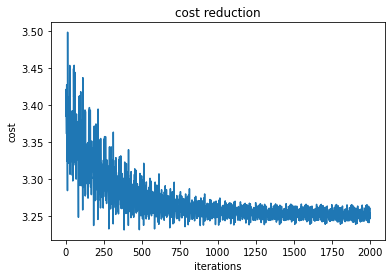

In [41]:
nr.seed(69)
w1=np.random.rand(10,16)
b1=np.zeros(10)
w2=np.random.rand(8,10)
b2=np.zeros(8)
w3=np.random.rand(26,8)
b3=np.zeros(26)
lr=0.01
iteration=20
batch=130
w1,b1,w2,b2,w3,b3,costs=model_predict(w1,w2,w3,b1,b2,b3,lr,iteration,batch)

In [42]:

x=np.array(train.iloc[:,0:16])
y_predicted=[]
for i in range(3500):
    x1=next_layer(w1,b1,x[i])
    x1=(x1-np.mean(x1))/np.std(x1)
    z1=sigmoidify(x1)
    x2=next_layer(w2,b2,z1)
    x2=(x2-np.mean(x2))/np.std(x2)
    z2=sigmoidify(x2)
    x3=next_layer(w3,b3,z2)
    y_predicted.append(int_to_char[np.argmax(x3)])

print(y_predicted) 


['N', 'P', 'N', 'N', 'P', 'N', 'E', 'P', 'P', 'P', 'E', 'P', 'N', 'N', 'P', 'P', 'N', 'N', 'E', 'P', 'N', 'N', 'P', 'E', 'N', 'P', 'N', 'P', 'P', 'P', 'P', 'E', 'N', 'P', 'P', 'P', 'E', 'P', 'P', 'P', 'P', 'N', 'N', 'N', 'P', 'N', 'N', 'N', 'N', 'N', 'P', 'P', 'N', 'P', 'N', 'P', 'P', 'P', 'P', 'N', 'N', 'P', 'P', 'E', 'P', 'P', 'P', 'P', 'P', 'N', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'E', 'N', 'E', 'E', 'P', 'E', 'N', 'P', 'N', 'E', 'P', 'N', 'N', 'N', 'P', 'P', 'P', 'N', 'P', 'N', 'P', 'N', 'N', 'P', 'P', 'N', 'E', 'N', 'P', 'P', 'E', 'N', 'P', 'P', 'P', 'P', 'N', 'P', 'N', 'P', 'P', 'E', 'N', 'P', 'P', 'P', 'E', 'P', 'N', 'E', 'E', 'N', 'N', 'P', 'P', 'P', 'N', 'N', 'P', 'E', 'E', 'P', 'E', 'N', 'P', 'P', 'N', 'P', 'P', 'P', 'E', 'N', 'P', 'P', 'N', 'P', 'E', 'P', 'P', 'E', 'N', 'P', 'P', 'E', 'P', 'P', 'N', 'E', 'P', 'P', 'N', 'P', 'P', 'P', 'E', 'P', 'P', 'N', 'E', 'N', 'P', 'P', 'N', 'N', 'N', 'P', 'P', 'N', 'P', 'N', 'P', 'P', 'P', 'E', 'E', 'N', 'P', 'P', 'P', 'P', 'N', 'E',